# Let's build a model of Logistic regression with sklearn

In [1]:
#Importing possibly necessary liabraries
import pandas as pd   # Data manipulation and data analysis
import numpy as np    # Support for large multi-dimensional arrays and matrices
import seaborn as sb  #statistical plotting of data like styles,color palettes,etc,.
import matplotlib.pyplot as plt   # For plotting 
from sklearn.linear_model import LogisticRegression #For model building
from sklearn import metrics #Accuracy calculation

In [2]:
#Assumption from the data i.e. what 0 and what is 1

#ATTORNEY = 0 => Hiring an attorney 1 => Not hiring
#CLMSEX = 0 Male; 1 female
#Clmins 1 = Insuered 0= uninsured
#Seatbelt 0 wearing 1 = Not wearing

In [2]:
claimants = pd.read_csv("Datasets\claimant.csv")

In [3]:
#Performing EDA and understanding the data
claimants.head(10)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


In [4]:
# Droping first column 
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [5]:
claimants.head(10)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
5,0,1.0,1.0,0.0,35.0,0.309
6,0,0.0,1.0,0.0,9.0,3.538
7,0,1.0,1.0,0.0,34.0,4.881
8,1,1.0,1.0,0.0,60.0,0.874
9,1,0.0,1.0,0.0,NaN,0.350


In [6]:
claimants.shape

(1340, 6)

<AxesSubplot:xlabel='ATTORNEY', ylabel='count'>

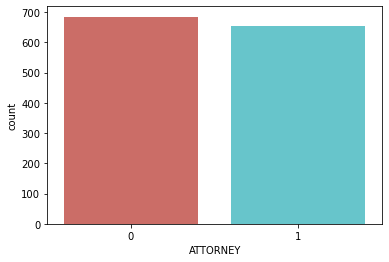

In [7]:
#Checking with count of each class i.e. hired or not hired
sb.countplot(x="ATTORNEY",data=claimants,palette="hls")

From above plot it's difficult to talk about exact count

In [8]:
#Checking it with value_counts() function
claimants.ATTORNEY.value_counts()

0    685
1    655
Name: ATTORNEY, dtype: int64

It shows that data is not too imbalanced

In [9]:
claimants.CLMSEX.value_counts()

1.0    742
0.0    586
Name: CLMSEX, dtype: int64

In [10]:
claimants.SEATBELT.value_counts()

0.0    1270
1.0      22
Name: SEATBELT, dtype: int64

In [11]:
claimants.CLMINSUR.value_counts()

1.0    1179
0.0     120
Name: CLMINSUR, dtype: int64

<AxesSubplot:xlabel='ATTORNEY'>

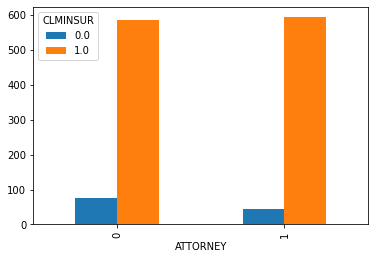

In [12]:
#Checking the cross tabulation and distribution of people having insurance v/s hired or not hired
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind="bar")

<AxesSubplot:xlabel='CLMSEX'>

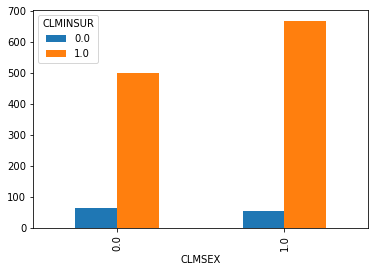

In [13]:
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind="bar")

<AxesSubplot:xlabel='SEATBELT'>

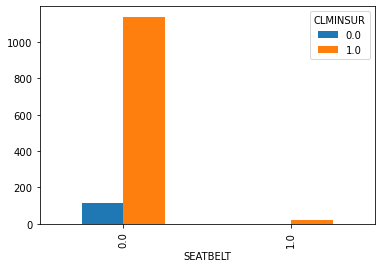

In [15]:
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind="bar")

<AxesSubplot:xlabel='ATTORNEY', ylabel='CLMAGE'>

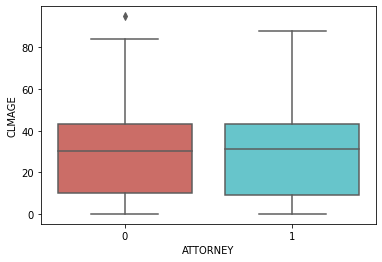

In [16]:
sb.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="hls")

<AxesSubplot:xlabel='ATTORNEY', ylabel='LOSS'>

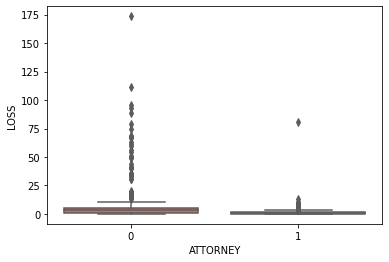

In [17]:
sb.boxplot(x="ATTORNEY",y="LOSS",data=claimants,palette="hls")

<AxesSubplot:xlabel='CLMSEX', ylabel='CLMAGE'>

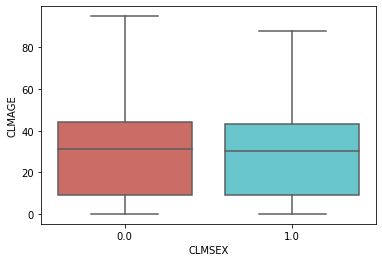

In [18]:
sb.boxplot(x="CLMSEX",y="CLMAGE",data=claimants,palette="hls")

<AxesSubplot:xlabel='CLMSEX', ylabel='LOSS'>

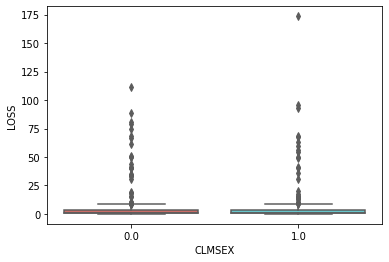

In [19]:
sb.boxplot(x="CLMSEX",y="LOSS",data=claimants,palette="hls")

<AxesSubplot:xlabel='SEATBELT', ylabel='CLMAGE'>

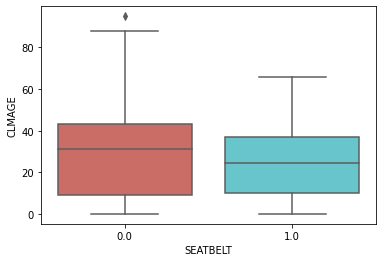

In [20]:
sb.boxplot(x="SEATBELT",y="CLMAGE",data=claimants,palette="hls")

<AxesSubplot:xlabel='SEATBELT', ylabel='LOSS'>

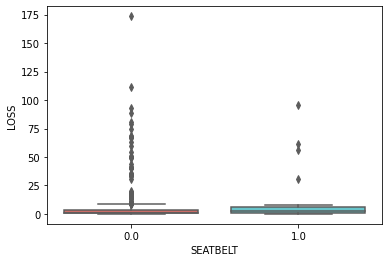

In [21]:
sb.boxplot(x="SEATBELT",y="LOSS",data=claimants,palette="hls")

<AxesSubplot:xlabel='CLMINSUR', ylabel='CLMAGE'>

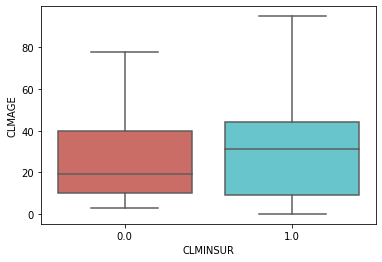

In [22]:
sb.boxplot(x="CLMINSUR",y="CLMAGE",data=claimants,palette="hls")

<AxesSubplot:xlabel='CLMINSUR', ylabel='LOSS'>

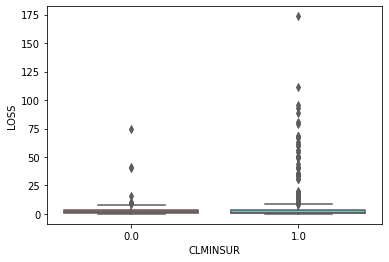

In [23]:
sb.boxplot(x="CLMINSUR",y="LOSS",data=claimants,palette="hls")

In [19]:
#Checking with null values in the data
claimants.isnull().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [15]:
claimants.shape

(1340, 6)

In [16]:
# Fill nan values with mode of the categorical column 
#Mode value imputation
print(claimants.CLMSEX.mode())
claimants["CLMSEX"].fillna(1,inplace=True)

0    1.0
dtype: float64


In [17]:
print(claimants.CLMINSUR.mode())
claimants["CLMINSUR"].fillna(1,inplace=True)

0    1.0
dtype: float64


In [18]:
print(claimants.SEATBELT.mode())
claimants["SEATBELT"].fillna(0,inplace=True)

0    0.0
dtype: float64


In [29]:
#Mean value imputation
claimants.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1340.000000,1340.000000,1151.000000,1340.000000
mean,0.488806,0.562687,0.910448,0.016418,28.414422,3.806307
std,0.500061,0.496240,0.285646,0.127124,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [20]:
claimants.CLMAGE.median()

30.0

In [21]:
claimants.CLMAGE.fillna(30,inplace=True)

In [22]:
claimants.isnull().sum() 

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [23]:
claimants.shape

(1340, 6)

In [24]:
# Creating input and output variables (as in X & Y) for Model building on entire data

X = claimants.iloc[:,[1,2,3,4,5]]   #Taking CLMSEX,CLIMINSUR,SEATBELT,CLIMAGE,LOSS Columns
#OR
X = claimants.iloc[:,1:]

Y = claimants.iloc[:,0]     #Taking ATTORNEY Column

In [25]:
X.head(5)

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [26]:
Y.head(5)

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

In [27]:
#Creating a model object by giving our model the name as classifier
classifier = LogisticRegression()

In [28]:
#Fitting the model
classifier.fit(X,Y)

LogisticRegression()

In [29]:
#Checking with model coefficients
print(classifier.intercept_)
print(classifier.coef_)

[-0.13633021]
[[ 0.31762837  0.50432929 -0.52808175  0.00680588 -0.322586  ]]


In [30]:
#Checking the mean accuracy of our model
classifier.score(X, Y)

0.7044776119402985

Logistic regression documentation from sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [31]:
#WE can also see the intercept and coefficients together
print (classifier.intercept_,classifier.coef_)

[-0.13633021] [[ 0.31762837  0.50432929 -0.52808175  0.00680588 -0.322586  ]]


In [32]:
#Getting predictions on Entire data in the form of probabilities
y_prob = classifier.predict_proba (X)

In [33]:
y_prob #try interpretting this in 0 and 1 predicted value

array([[9.99974142e-01, 2.58580683e-05],
       [4.95905145e-01, 5.04094855e-01],
       [4.26639549e-01, 5.73360451e-01],
       ...,
       [2.85137120e-01, 7.14862880e-01],
       [6.87640320e-01, 3.12359680e-01],
       [3.38975173e-01, 6.61024827e-01]])

In [34]:
#Prdicted values in 0 and 1
y_pred = classifier.predict(X)

In [35]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [36]:
#Adding a column in original dataset for storing the predictions
claimants["y_pred"] = y_pred

In [47]:
claimants.head(20)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred
0,0,0.0,1.0,0.0,50.0,34.940,0
1,1,1.0,0.0,0.0,18.0,0.891,1
2,1,0.0,1.0,0.0,5.0,0.330,1
3,0,0.0,1.0,1.0,31.0,0.037,1
4,1,0.0,1.0,0.0,30.0,0.038,1
5,0,1.0,1.0,0.0,35.0,0.309,1
6,0,0.0,1.0,0.0,9.0,3.538,0
7,0,1.0,1.0,0.0,34.0,4.881,0
8,1,1.0,1.0,0.0,60.0,0.874,1
9,1,0.0,1.0,0.0,30.0,0.350,1


In [37]:
#Create a dataframe for probability predictions
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))

In [38]:
y_prob

,0,1
0,0.999974,0.000026
1,0.495905,0.504095
2,0.426640,0.573360
3,0.490260,0.509740
4,0.363567,0.636433
...,...,...
1335,0.404592,0.595408
1336,0.548963,0.451037
1337,0.285137,0.714863
1338,0.687640,0.312360


In [39]:
#Concat the probability dataframe with actual Attorney class and predicted class to create a new dataset
new_df = pd.concat([claimants.iloc[:,[0,6]],y_prob],axis=1)

In [40]:
new_df.head(10)

,ATTORNEY,y_pred,0,1
0,0,0,0.999974,0.000026
1,1,1,0.495905,0.504095
2,1,1,0.426640,0.573360
3,0,1,0.490260,0.509740
4,1,1,0.363567,0.636433
5,0,1,0.304883,0.695117
6,0,0,0.670856,0.329144
7,0,0,0.658702,0.341298
8,1,1,0.307456,0.692544
9,1,1,0.387159,0.612841


In [41]:
# confusion_matrix

from sklearn.metrics import confusion_matrix   
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[436 249]
 [147 508]]


In [42]:
#Other ways to plot the confusion marix

pd.crosstab(y_pred,Y)

ATTORNEY,0,1
row_0,,
0,436,147
1,249,508


In [43]:
pd.crosstab(Y,y_pred)

col_0,0,1
ATTORNEY,,
0,436,249
1,147,508


In [44]:
#Different ways to claculate accuracies

accuracy = sum(Y==y_pred)/claimants.shape[0] #70.37%
accuracy

0.7044776119402985

In [45]:
accuracy = sum(Y==y_pred)/1340
accuracy

0.7044776119402985

In [46]:
accuracy = (436+508)/(436+147+249+508)
accuracy

0.7044776119402985

In [47]:
classifier.score(X, Y)

0.7044776119402985

In [48]:
y_prob.head(5)

,0,1
0,0.999974,0.000026
1,0.495905,0.504095
2,0.426640,0.573360
3,0.490260,0.509740
4,0.363567,0.636433


          fpr       tpr    thresholds
0    0.000000  0.000000           inf
1    0.000000  0.001527  7.705902e-01
2    0.000000  0.003053  7.686568e-01
3    0.001460  0.003053  7.596476e-01
4    0.001460  0.007634  7.571709e-01
..        ...       ...           ...
537  0.931387  0.996947  4.194047e-02
538  0.931387  0.998473  4.046831e-02
539  0.992701  0.998473  1.407409e-11
540  0.992701  1.000000  7.954441e-12
541  1.000000  1.000000  1.295012e-24

[542 rows x 3 columns]


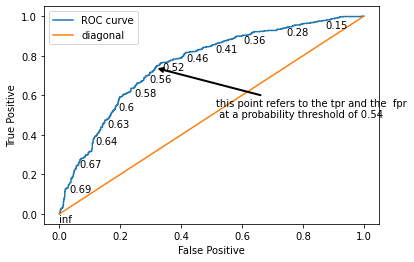

In [49]:
#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(Y, y_prob.iloc[:,1]) #We want only prob of event occuring

ROC_table = pd.DataFrame(pd.DataFrame(zip(fpr, tpr, thresholds),
                       columns=['fpr','tpr', 'thresholds']))

print(ROC_table)

fig,ax = plt.subplots()
plt.plot(fpr,tpr, label="ROC curve");
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal");

for x, y, txt in zip(fpr[::40], tpr[::40], thresholds[::40]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
    
rnd_idx = 300
plt.annotate('this point refers to the tpr and the  fpr\n at a probability threshold of {}'.format(np.round(thresholds[rnd_idx], 2)), 
             xy=(fpr[rnd_idx], tpr[rnd_idx]), xytext=(fpr[rnd_idx]+0.2, tpr[rnd_idx]-0.25),
             arrowprops=dict(facecolor='black', lw=2, arrowstyle='->'),)

plt.legend(loc="upper left")
plt.xlabel("False Positive");
plt.ylabel("True Positive");

Above plot tells us that istead of the default threshold we have used which was 0.50 to bifurcate between classification of 0 and 1, if we use 0.55 then we get more accuracy, so we can use our probabilities to calculate the predictions using this threshold. Actually this curve will be more usefull to cmapare between the models, the model with high AUC is a better model.

In [50]:
#Area under the curve
roc_auc = metrics.auc(fpr, tpr)
roc_auc #76

0.7604713879757062

For more knowledge on ROC and AUC one can follow the following link:

https://towardsdatascience.com/demystifying-roc-curves-df809474529a

# Practice purpose

Now you can split the data into train and test and rebuild the model to see how it works on test data